<a href="https://colab.research.google.com/github/Karthikeyan-ganesan86/CS/blob/master/Heart%20Stroke%20EDA%20and%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and Members

In [1]:
#**************************************************************************#
#Import all libraries for using in the program                             # 
#**************************************************************************#
#            TEAM MEMBERS                                                  #
#--------------------------------------------------------------------------#
#           Name       BITS ID                                             #
#--------------------------------------------------------------------------#
#      Karthikeyan G  2021MT13339                                          #
#--------------------------------------------------------------------------#
#**************************************************************************#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
print(matplotlib.__version__)

3.5.0


# Read the input files

In [2]:
#**************************************************************************#
#Used this for testing file reading from location                          #
#**************************************************************************#
#df=pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv') 
#-- This let me read from folder above my jupyter notebook base folder in input folder
# Else provide the full location as below
#df=pd.read_csv('C:/Users/karth/input/healthcare-dataset-stroke-data.csv')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Please point to correct location based on above comment statements in case of finding file issues

In [3]:
#**************************************************************************#
#     Read the csv into the dataframe                                      #
#**************************************************************************#
# Read csv to a dataframe
df=pd.read_csv('drive/My Drive/input/healthcare-dataset-stroke-data.csv')
df1=pd.read_csv('drive/My Drive/input/healthcare-dataset-stroke-data.csv')
#**************************************************************************#
#     Look at first 10 records in dataframe(Includes the heading)          #
#**************************************************************************#
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


# Data Preprocessing and Visualization

In [4]:
#**************************************************************************#
#     Drop the id column and rows in gender column with value 'Other'      #
#**************************************************************************#
df.drop(columns=['id'], inplace=True)
df = df[df['gender'] != 'Other']

In [5]:
#**************************************************************************#
#     STEP to get median in bmi column                                     #
#     Evaluation step                                                      #
#**************************************************************************#
df['bmi'].median()

28.1

In [6]:
#***********************************************************************************#
#     STEP to extract mode value(removing any extrinsic values) in bmi column       #
#     Evaluation step                                                               #
#***********************************************************************************#
df['bmi'].mode().iat[0]

28.7

In [7]:
#***********************************************************************************#
# filling missing bmi values with median of bmi attribute                           #
#***********************************************************************************#
#df['bmi'].fillna(df['bmi'].median(),inplace = True)
df['bmi'].fillna(np.round(df['bmi'].median(), 1), inplace = True)

In [8]:
#**********************************************************************************************************#
#     Look at first 10 records in dataframe(Includes the heading) used to check if "na" values are replaced#
#**********************************************************************************************************#
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [9]:
#***************************************************************************************************************#
# Add new column to categorize Self-employed - "Private-Attribute construction"-Data Processing technique)      #
#***************************************************************************************************************#
df.loc[df['work_type'] == 'Self-employed', 'work_type_merge'] = 'Private'
df.loc[df['work_type'] != 'Self-employed', 'work_type_merge'] = df['work_type']

In [10]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.863300,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.699785,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
#***************************************************************************************************************#
# Add new column to categorize a1c_level - "Attribute construction"-Data preprocessing technique)               #
# a1c levels explanation                                                                                        #
#***************************************************************************************************************#
# avg_glucose_level < 140 is Normal                                                                             #
# avg_glucose_level between 140 and 200 is Prediabetes                                                          #
# avg_glucose_level > 200 is diabetes                                                                           #
#***************************************************************************************************************#
df.loc[df['avg_glucose_level'] < 140, 'a1c_level'] = 'Normal' 
df.loc[(df['avg_glucose_level'] > 139) & (df['avg_glucose_level'] < 200), 'a1c_level'] = 'Prediabetes'
df.loc[df['avg_glucose_level'] > 199, 'a1c_level'] = 'Diabetes' 

In [12]:
#***************************************************************************************************************#
# Add new column to categorize bmi - "Attribute construction"-Data preprocessing technique)                     #
# bmi levels explanation                                                                                        #
#***************************************************************************************************************#
# bmi < 18.5 is Underweight                                                                                     #
# bmi between 18.5 and 24.9 is Healthy weight                                                                   #
# bmi between 25.0 and 29.9 is Over weight                                                                      #
# bmi >= 30 is Obesity                                                                                          #
#***************************************************************************************************************#
df.loc[df['bmi'] < 18.5, 'weight_status'] = 'Underweight' 
df.loc[(df['bmi'] > 18.4) & (df['bmi'] < 25), 'weight_status'] = 'Healthy weight'
df.loc[(df['bmi'] > 24.9) & (df['bmi'] < 30), 'weight_status'] = 'Over weight'
df.loc[df['bmi'] > 29.9, 'weight_status'] = 'Obesity'
print(df)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smok

In [13]:
# Discretize with respective equal-width bin
df['age_binned'] = pd.cut(
    df['age'], 
    [0, 25, 50, 75, 100], 
    labels=['0-25', '26-50', '51-75','75+']
)
print(df)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smok

# Groupby various columns to evaluate the "stroke"  

In [14]:
#******************************************************************************************************************#
#  Sum Stroke based on Residence Type "Aggregation"-Data Preprocessing Technique                                   #
#******************************************************************************************************************#
df.groupby('Residence_type',as_index=False).agg({"stroke": 'sum'})

,Residence_type,stroke
0,Rural,114
1,Urban,135


In [15]:
#******************************************************************************************************************#
#  Sum Stroke based on Residence Type "work_type_merge"-Data Preprocessing Technique                               #
#******************************************************************************************************************#
df.groupby('work_type_merge',as_index=False).agg({"stroke": 'sum'})

,work_type_merge,stroke
0,Govt_job,33
1,Never_worked,0
2,Private,214
3,children,2


In [16]:
df.groupby('smoking_status',as_index=False).agg({"stroke": 'sum'})

,smoking_status,stroke
0,Unknown,47
1,formerly smoked,70
2,never smoked,90
3,smokes,42


In [17]:
df.groupby('a1c_level',as_index=False).agg({"stroke": 'sum'})

,a1c_level,stroke
0,Diabetes,59
1,Normal,156
2,Prediabetes,34


In [18]:
df.groupby('weight_status',as_index=False).agg({"stroke": 'sum'})

,weight_status,stroke
0,Healthy weight,35
1,Obesity,98
2,Over weight,115
3,Underweight,1


In [19]:
df.groupby('ever_married',as_index=False).agg({"stroke": 'sum'})

,ever_married,stroke
0,No,29
1,Yes,220


In [20]:
df.groupby('gender',as_index=False).agg({"stroke": 'sum'})

,gender,stroke
0,Female,141
1,Male,108


In [21]:
df.groupby('age_binned',as_index=False).agg({"stroke": 'sum'})

,age_binned,stroke
0,0-25,2
1,26-50,21
2,51-75,130
3,75+,96


In [22]:
#******************************************************************************************************************#
#  Summary of above evaluation                                                                                     #
#******************************************************************************************************************#
# Based on the evaluation - Stroke happens based on Age, Bmi etc

# Visualizations

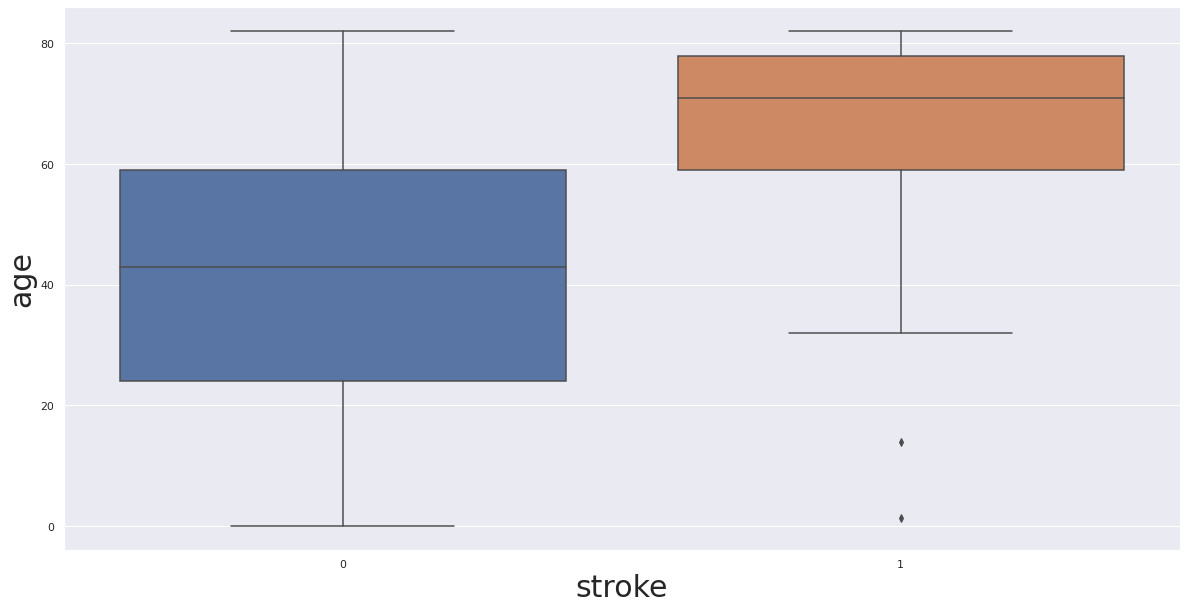

In [23]:
#******************************************************************************************************************#
#  Box plot for age binned and stroke                                                                              #
#******************************************************************************************************************#
sns.set(rc={'figure.figsize':(20,10)})
seaborn_plot = sns.boxplot(x='stroke',y='age', data=df)
seaborn_plot.set_xlabel("stroke",fontsize=30)
seaborn_plot.set_ylabel("age",fontsize=30)
plt.show()

In [24]:
#******************************************************************************************************************#
#  To evaluate age and stroke count                                                                                #
#******************************************************************************************************************#
df1=df.groupby('age_binned',as_index=False).agg({"stroke": 'sum'})
df1.reset_index(inplace=True)
print(df1)

   index age_binned  stroke
0      0       0-25       2
1      1      26-50      21
2      2      51-75     130
3      3        75+      96


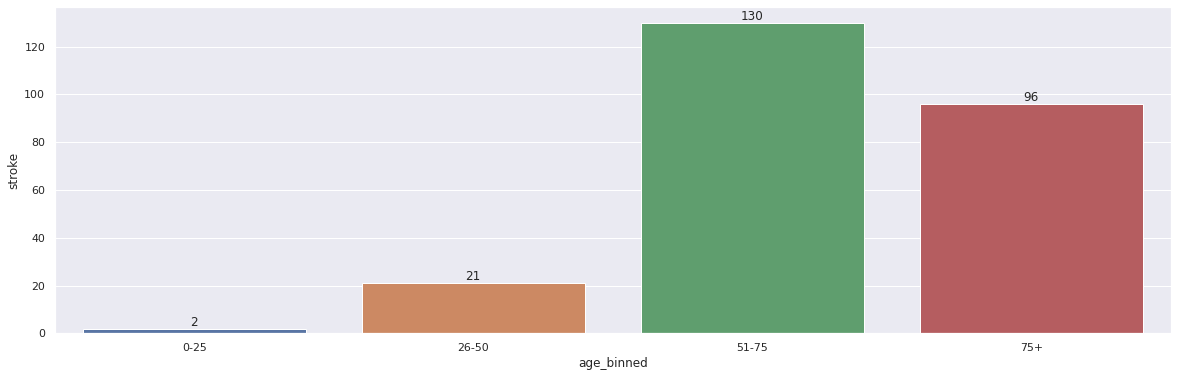

In [25]:
#******************************************************************************************************************#
#  To evaluate age and stroke count in bar                                                                         #
#******************************************************************************************************************#
sns.set(rc={'figure.figsize':(20,6)})
ax = sns.barplot(x='age_binned', y='stroke', data=df1)
for container in ax.containers:
      ax.bar_label(container)

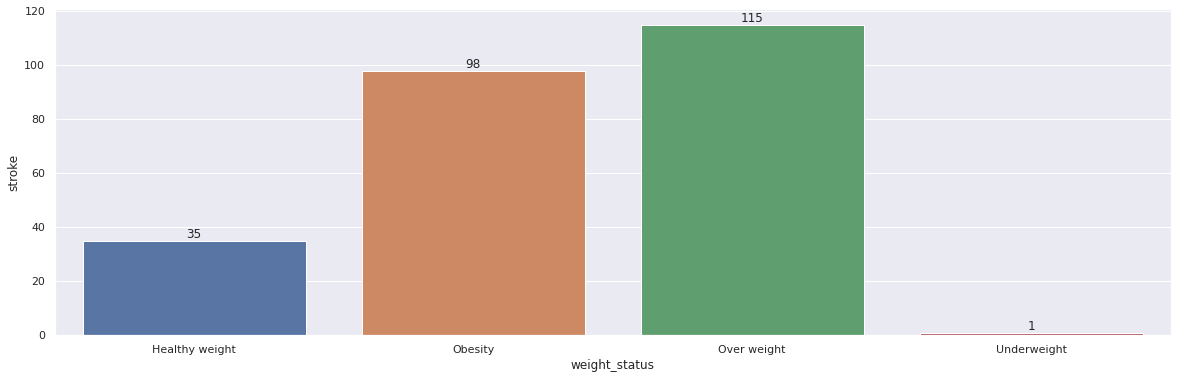

In [26]:
#******************************************************************************************************************#
#  To evaluate bmi and stroke count in bar plot                                                                    #
#******************************************************************************************************************#
df2=df.groupby('weight_status',as_index=False).agg({"stroke": 'sum'})
sns.set(rc={'figure.figsize':(20,6)})
ax = sns.barplot(x='weight_status', y='stroke', data=df2)
for container in ax.containers:
    ax.bar_label(container)

# Data Analysis & its preprocessing steps

In [27]:
#******************************************************************************************************************#
#  Find unique values in df dataframe                                                                              #
#******************************************************************************************************************#
for i in df.columns:
    print(i,df[i].unique())

gender ['Male' 'Female']
age [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-01 4.80e-01 1.60e-01]
hypertension [0 1]
he

In [28]:
#******************************************************************************************************************#
#  make values binary for all columns in dataset                                                                   #
#******************************************************************************************************************#
df['gender_bin'] = df['gender'].apply(lambda x: 1 if x=='Male'else 0)
df['ever_married_bin'] = df['ever_married'].apply(lambda x: 1 if x=='Yes'else 0)
df['work_type_bin'] = df['work_type'].apply(lambda x: 1 if x=='Private'else 0)
df['Residence_type_bin'] = df['Residence_type'].apply(lambda x: 1 if x=='Urban'else 0)
df['smoking_status_bin'] = df['smoking_status'].apply(lambda x: 1 if x=='smokes'else 0)
df['age_bin'] = df['age'].apply(lambda x: 1 if x > 50 else 0)
df['diabetes_bin'] = df['a1c_level'].apply(lambda x: 1 if x != 'Normal' else 0)
df['bmi_bin'] = df['weight_status'].apply(lambda x: 1 if x != 'Healthy weight' else 0)

In [29]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,weight_status,age_binned,gender_bin,ever_married_bin,work_type_bin,Residence_type_bin,smoking_status_bin,age_bin,diabetes_bin,bmi_bin
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,...,Obesity,51-75,1,1,1,1,0,1,1,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,...,Over weight,51-75,0,1,0,0,0,1,1,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,...,Obesity,75+,1,1,1,0,0,1,0,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,...,Obesity,26-50,0,1,1,1,1,0,1,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,...,Healthy weight,75+,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,...,Over weight,75+,0,1,1,1,0,1,0,1
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,...,Obesity,75+,0,1,0,1,0,1,0,1
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,...,Obesity,26-50,0,1,0,0,0,0,0,1
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,...,Over weight,51-75,1,1,1,0,0,1,1,1


In [30]:
#******************************************************************************************************************#
#  Create a dataframe with columns with only binary dataset                                                        #
#******************************************************************************************************************#
df_bin = df[['gender_bin','age_bin','hypertension','heart_disease',
            'ever_married_bin','work_type_bin','Residence_type_bin','smoking_status_bin','diabetes_bin','bmi_bin','stroke']]
df_bin

,gender_bin,age_bin,hypertension,heart_disease,ever_married_bin,work_type_bin,Residence_type_bin,smoking_status_bin,diabetes_bin,bmi_bin,stroke
0,1,1,0,1,1,1,1,0,1,1,1
1,0,1,0,0,1,0,0,0,1,1,1
2,1,1,0,1,1,1,0,0,0,1,1
3,0,0,0,0,1,1,1,1,1,1,1
4,0,1,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,1,0,1,1,1,0,0,1,0
5106,0,1,0,0,1,0,1,0,0,1,0
5107,0,0,0,0,1,0,0,0,0,1,0
5108,1,1,0,0,1,1,0,0,1,1,0


In [31]:
#******************************************************************************************************************#
#  Validate unique values in df_bin                                                                                #
#******************************************************************************************************************#
for i in df_bin.columns:
    print(i,df_bin[i].unique())

gender_bin [1 0]
age_bin [1 0]
hypertension [0 1]
heart_disease [1 0]
ever_married_bin [1 0]
work_type_bin [1 0]
Residence_type_bin [1 0]
smoking_status_bin [0 1]
diabetes_bin [1 0]
bmi_bin [1 0]
stroke [1 0]


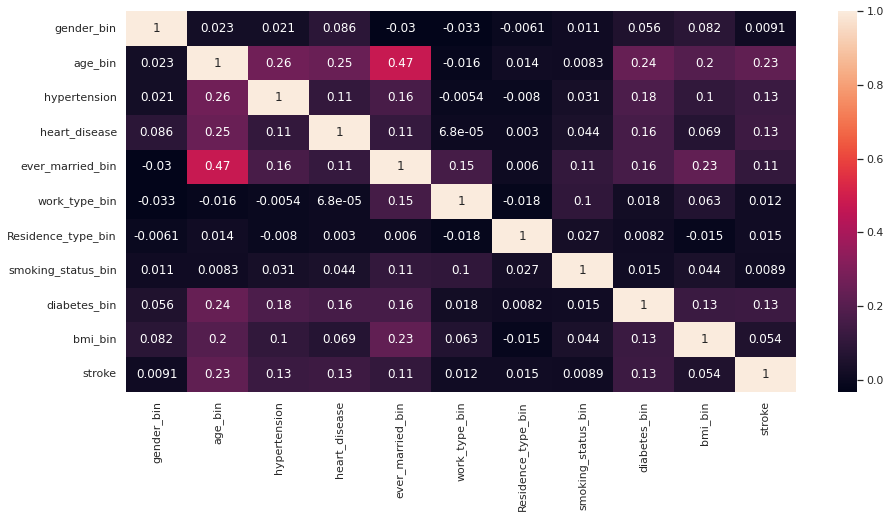

In [32]:
plt.figure(figsize=(15,7))
sns.heatmap(df_bin.corr(),annot=True);

In [33]:
#******************************************************************************************************************#
#  Create a dataframe with columns with only binary dataset and drop non stroke records                            #
#******************************************************************************************************************#
df_fp = df[['gender_bin','age_bin','hypertension','heart_disease',
            'ever_married_bin','work_type_bin','Residence_type_bin','smoking_status_bin','diabetes_bin','bmi_bin','stroke']]
df_fp = df_fp[df_fp['stroke'] != 0]
df_fp.drop(columns=['stroke'], inplace=True)

In [34]:
df_fp

,gender_bin,age_bin,hypertension,heart_disease,ever_married_bin,work_type_bin,Residence_type_bin,smoking_status_bin,diabetes_bin,bmi_bin
0,1,1,0,1,1,1,1,0,1,1
1,0,1,0,0,1,0,0,0,1,1
2,1,1,0,1,1,1,0,0,0,1
3,0,0,0,0,1,1,1,1,1,1
4,0,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
244,1,1,0,0,1,1,0,0,0,1
245,0,0,0,0,0,0,0,0,0,1
246,0,1,0,0,1,0,0,0,0,1
247,1,1,1,0,1,0,0,0,0,1


In [35]:
#******************************************************************************************************************#
#  Validate the df_fin counts for stroke records                                                                   #
#******************************************************************************************************************#
df_fp.sum()

gender_bin            108
age_bin               226
hypertension           66
heart_disease          47
ever_married_bin      220
work_type_bin         149
Residence_type_bin    135
smoking_status_bin     42
diabetes_bin           93
bmi_bin               214
dtype: int64

In [36]:
df_fp.shape[0]

249

# FP sets

In [37]:
#******************************************************************************************************************#
#  first dataframe with calculated "Support" values                                                                #
#******************************************************************************************************************#
first = pd.DataFrame(df_fp.sum() / df_fp.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
age_bin,0.907631
ever_married_bin,0.883534
bmi_bin,0.859438
work_type_bin,0.598394
Residence_type_bin,0.542169
gender_bin,0.433735
diabetes_bin,0.373494
hypertension,0.265060
heart_disease,0.188755
smoking_status_bin,0.168675


In [38]:
#******************************************************************************************************************#
#  Records with minimum support >=20                                                                               #
#******************************************************************************************************************#
first[first.Support >= 0.20]

,Support
age_bin,0.907631
ever_married_bin,0.883534
bmi_bin,0.859438
work_type_bin,0.598394
Residence_type_bin,0.542169
gender_bin,0.433735
diabetes_bin,0.373494
hypertension,0.265060


In [39]:
#******************************************************************************************************************#
#  Find FP pattern for 2 Item sets                                                                                 #
#******************************************************************************************************************#
import itertools
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
# Sample of combinations
second[:10]

[['age_bin', 'ever_married_bin'],
 ['age_bin', 'bmi_bin'],
 ['age_bin', 'work_type_bin'],
 ['age_bin', 'Residence_type_bin'],
 ['age_bin', 'gender_bin'],
 ['age_bin', 'diabetes_bin'],
 ['age_bin', 'hypertension'],
 ['age_bin', 'heart_disease'],
 ['age_bin', 'smoking_status_bin'],
 ['ever_married_bin', 'bmi_bin']]

In [40]:
# Finding support values for FP 2 pattern item set
value = []
for i in range(0, len(second)):
    temp = df_fp.T.loc[second[i]].sum() 
    temp = len(temp[temp == df_fp.T.loc[second[i]].shape[0]]) / df_fp.shape[0]
    value.append(temp)
# Create a data frame            
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.2]
secondIteration

,Support,length
index,,
"(age_bin, ever_married_bin)",0.811245,2
"(age_bin, bmi_bin)",0.775100,2
"(ever_married_bin, bmi_bin)",0.767068,2
"(ever_married_bin, work_type_bin)",0.542169,2
"(age_bin, work_type_bin)",0.534137,2
"(bmi_bin, work_type_bin)",0.510040,2
"(age_bin, Residence_type_bin)",0.497992,2
"(bmi_bin, Residence_type_bin)",0.469880,2
"(ever_married_bin, Residence_type_bin)",0.457831,2


In [41]:
#******************************************************************************************************************#
#  function that will be called  for Frequent pattern itemset creation                                             #
#******************************************************************************************************************#
def ar_iterations(data, num_iter = 1, support_value = 0.2, iterationIndex = None):
    
    # Next Iterations
    def ar_calculation(iterationIndex = iterationIndex): 
        # Calculation of support value
        value = []
        for i in range(0, len(iterationIndex)):
            result = data.T.loc[iterationIndex[i]].sum() 
            result = len(result[result == data.T.loc[iterationIndex[i]].shape[0]]) / data.shape[0]
            value.append(result)
        # Bind results
        result = pd.DataFrame(value, columns = ["Support"])
        result["index"] = [tuple(i) for i in iterationIndex]
        result['length'] = result['index'].apply(lambda x:len(x))
        result = result.set_index("index").sort_values("Support", ascending = False)
        # Elimination by Support Value
        result = result[result.Support > support_value]
        return result    
    
    # First Iteration
    first = pd.DataFrame(df_fp.T.sum(axis = 1) / df_fp.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
    first = first[first.Support > support_value]
    first["length"] = 1
    
    if num_iter == 1:
        res = first.copy()
        
    # Second Iteration
    elif num_iter == 2:
        
        second = list(itertools.combinations(first.index, 2))
        second = [list(i) for i in second]
        res = ar_calculation(second)
        
    # All Iterations > 2
    else:
        nth = list(itertools.combinations(set(list(itertools.chain(*iterationIndex))), num_iter))
        nth = [list(i) for i in nth]
        res = ar_calculation(nth)
    
    return res

In [42]:
#******************************************************************************************************************#
#  FP itemset 1                                                                                                    #
#******************************************************************************************************************#
iteration1 = ar_iterations(df_fp, num_iter=1, support_value=0.3)
iteration1

,Support,length
age_bin,0.907631,1
ever_married_bin,0.883534,1
bmi_bin,0.859438,1
work_type_bin,0.598394,1
Residence_type_bin,0.542169,1
gender_bin,0.433735,1
diabetes_bin,0.373494,1


In [43]:
#******************************************************************************************************************#
#  FP itemset 2                                                                                                    #
#******************************************************************************************************************#
iteration2 = ar_iterations(df_fp, num_iter=2, support_value=0.3)
iteration2

,Support,length
index,,
"(age_bin, ever_married_bin)",0.811245,2
"(age_bin, bmi_bin)",0.775100,2
"(ever_married_bin, bmi_bin)",0.767068,2
"(ever_married_bin, work_type_bin)",0.542169,2
"(age_bin, work_type_bin)",0.534137,2
"(bmi_bin, work_type_bin)",0.510040,2
"(age_bin, Residence_type_bin)",0.497992,2
"(bmi_bin, Residence_type_bin)",0.469880,2
"(ever_married_bin, Residence_type_bin)",0.457831,2


In [44]:
#******************************************************************************************************************#
#  FP itemset 3                                                                                                    #
#******************************************************************************************************************#
iteration3 = ar_iterations(df_fp, num_iter=3, support_value=0.3,
              iterationIndex=iteration2.index)
iteration3

,Support,length
index,,
"(ever_married_bin, age_bin, bmi_bin)",0.698795,3
"(work_type_bin, ever_married_bin, age_bin)",0.481928,3
"(work_type_bin, ever_married_bin, bmi_bin)",0.469880,3
"(work_type_bin, age_bin, bmi_bin)",0.449799,3
"(age_bin, Residence_type_bin, bmi_bin)",0.433735,3
"(ever_married_bin, age_bin, Residence_type_bin)",0.425703,3
"(ever_married_bin, Residence_type_bin, bmi_bin)",0.405622,3
"(gender_bin, ever_married_bin, age_bin)",0.385542,3
"(gender_bin, age_bin, bmi_bin)",0.373494,3


In [45]:
#******************************************************************************************************************#
#  FP itemset 4                                                                                                    #
#******************************************************************************************************************#
iteration4 = ar_iterations(df_fp, num_iter=4, support_value=0.3,
              iterationIndex=iteration3.index)
iteration4

,Support,length
index,,
"(work_type_bin, ever_married_bin, age_bin, bmi_bin)",0.413655,4
"(ever_married_bin, age_bin, Residence_type_bin, bmi_bin)",0.377510,4
"(gender_bin, ever_married_bin, age_bin, bmi_bin)",0.353414,4
"(ever_married_bin, diabetes_bin, age_bin, bmi_bin)",0.321285,4


# APRIORI

In [47]:
# APRIORI FUNCTION 
from mlxtend.frequent_patterns import apriori, association_rules
# Apriori on df_fp with minimum support of 0.3
freq_items = apriori(df_fp, min_support = 0.3, use_colnames = True)
#, verbose = 1
freq_items.sort_values("support", ascending = False)

,support,itemsets
1,0.907631,(age_bin)
2,0.883534,(ever_married_bin)
6,0.859438,(bmi_bin)
10,0.811245,"(age_bin, ever_married_bin)"
14,0.775100,"(age_bin, bmi_bin)"
18,0.767068,"(bmi_bin, ever_married_bin)"
29,0.698795,"(age_bin, ever_married_bin, bmi_bin)"
3,0.598394,(work_type_bin)
4,0.542169,(Residence_type_bin)
15,0.542169,"(work_type_bin, ever_married_bin)"


In [48]:
#******************************************************************************************************************#
#  Itemsets and support values top 5                                                                               #
#******************************************************************************************************************#
freq_items.sort_values("support", ascending = False).head(5)

,support,itemsets
1,0.907631,(age_bin)
2,0.883534,(ever_married_bin)
6,0.859438,(bmi_bin)
10,0.811245,"(age_bin, ever_married_bin)"
14,0.775100,"(age_bin, bmi_bin)"


In [49]:
#******************************************************************************************************************#
#  Itemsets and support values bottom 5                                                                            #
#******************************************************************************************************************#
freq_items.sort_values("support", ascending = False).tail(5)

,support,itemsets
28,0.337349,"(age_bin, ever_married_bin, diabetes_bin)"
36,0.337349,"(ever_married_bin, bmi_bin, diabetes_bin)"
19,0.325301,"(work_type_bin, Residence_type_bin)"
40,0.321285,"(age_bin, ever_married_bin, bmi_bin, diabetes_..."
30,0.301205,"(age_bin, work_type_bin, Residence_type_bin)"


In [50]:
# Association Rules & Info for parameter confidence > 0.5
df_ar = association_rules(freq_items, metric = "confidence", min_threshold = 0.5)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(gender_bin),(age_bin),0.433735,0.907631,0.409639,0.944444,1.040560,0.015967,1.662651
1,(gender_bin),(ever_married_bin),0.433735,0.883534,0.401606,0.925926,1.047980,0.018387,1.572289
2,(gender_bin),(bmi_bin),0.433735,0.859438,0.397590,0.916667,1.066589,0.024822,1.686747
3,(age_bin),(ever_married_bin),0.907631,0.883534,0.811245,0.893805,1.011625,0.009322,1.096720
4,(ever_married_bin),(age_bin),0.883534,0.907631,0.811245,0.918182,1.011625,0.009322,1.128960
...,...,...,...,...,...,...,...,...,...
114,"(bmi_bin, ever_married_bin, diabetes_bin)",(age_bin),0.337349,0.907631,0.321285,0.952381,1.049305,0.015097,1.939759
115,"(age_bin, diabetes_bin)","(bmi_bin, ever_married_bin)",0.357430,0.767068,0.321285,0.898876,1.171834,0.047112,2.303436
116,"(ever_married_bin, diabetes_bin)","(age_bin, bmi_bin)",0.353414,0.775100,0.321285,0.909091,1.172869,0.047354,2.473896
117,"(bmi_bin, diabetes_bin)","(age_bin, ever_married_bin)",0.357430,0.811245,0.321285,0.898876,1.108021,0.031322,1.866577


In [51]:
# Association Rules & Info for parameter confidence > 0.5 and support> 0.5
df_ar[(df_ar.support > 0.5) & (df_ar.confidence > 0.5)].sort_values("confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(ever_married_bin),(age_bin),0.883534,0.907631,0.811245,0.918182,1.011625,0.009322,1.128960
50,"(bmi_bin, ever_married_bin)",(age_bin),0.767068,0.907631,0.698795,0.910995,1.003707,0.002581,1.037798
12,(work_type_bin),(ever_married_bin),0.598394,0.883534,0.542169,0.906040,1.025473,0.013468,1.239530
11,(bmi_bin),(age_bin),0.859438,0.907631,0.775100,0.901869,0.993652,-0.004952,0.941289
49,"(age_bin, bmi_bin)",(ever_married_bin),0.775100,0.883534,0.698795,0.901554,1.020396,0.013968,1.183048
3,(age_bin),(ever_married_bin),0.907631,0.883534,0.811245,0.893805,1.011625,0.009322,1.096720
6,(work_type_bin),(age_bin),0.598394,0.907631,0.534137,0.892617,0.983459,-0.008984,0.860191
17,(bmi_bin),(ever_married_bin),0.859438,0.883534,0.767068,0.892523,1.010174,0.007726,1.083639
18,(ever_married_bin),(bmi_bin),0.883534,0.859438,0.767068,0.868182,1.010174,0.007726,1.066334
48,"(age_bin, ever_married_bin)",(bmi_bin),0.811245,0.859438,0.698795,0.861386,1.002267,0.001581,1.014056


# DECISION TREE

In [52]:
for i in df_bin.columns:
    print(i,df_bin[i].sum())

gender_bin 2115
age_bin 2127
hypertension 498
heart_disease 276
ever_married_bin 3353
work_type_bin 2924
Residence_type_bin 2596
smoking_status_bin 789
diabetes_bin 829
bmi_bin 3867
stroke 249


In [53]:
#******************************************************************************************************************#
#  Train Decision Tree with values from df_bin                                                                     #
#******************************************************************************************************************#
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(df_bin.drop('stroke',axis=1), df_bin['stroke'], test_size=0.3, random_state=0)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3576, 10)
(1533, 10)
(3576,)
(1533,)


In [56]:
#******************************************************************************************************************#
#  fit the trained model for entropy criteria                                                                      #
#******************************************************************************************************************#
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

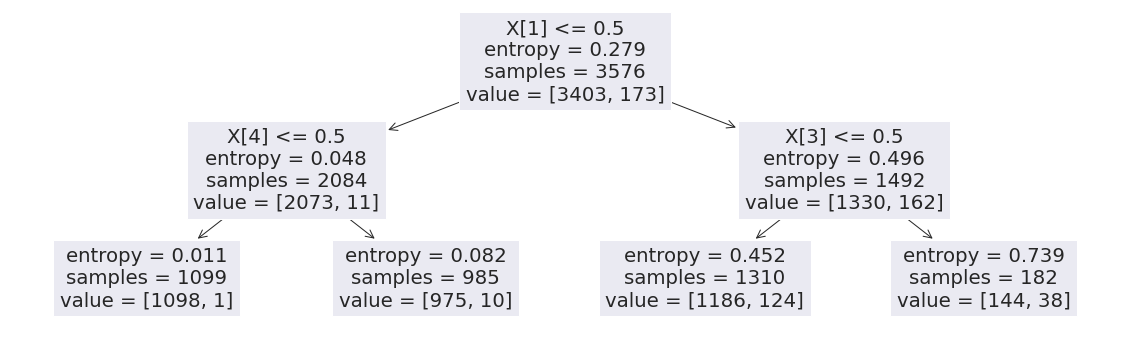

In [57]:
#******************************************************************************************************************#
#  Plot decision tree                                                                                              #
#******************************************************************************************************************#
plot_tree(model);

In [58]:
df_bin

,gender_bin,age_bin,hypertension,heart_disease,ever_married_bin,work_type_bin,Residence_type_bin,smoking_status_bin,diabetes_bin,bmi_bin,stroke
0,1,1,0,1,1,1,1,0,1,1,1
1,0,1,0,0,1,0,0,0,1,1,1
2,1,1,0,1,1,1,0,0,0,1,1
3,0,0,0,0,1,1,1,1,1,1,1
4,0,1,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,1,0,1,1,1,0,0,1,0
5106,0,1,0,0,1,0,1,0,0,1,0
5107,0,0,0,0,1,0,0,0,0,1,0
5108,1,1,0,0,1,1,0,0,1,1,0


# Naive Bayes and KMeans

In [59]:
#******************************************************************************************************************#
#  Bring in necessary inputs                                                                                       #
#******************************************************************************************************************#
x=df_bin.drop(['stroke'], axis=1)
y=df_bin['stroke']
# Models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 124)

In [60]:
#******************************************************************************************************************#
#  Fit the models                                                                                                  #
#******************************************************************************************************************#
models = dict()
models['Naive Bayes'] = GaussianNB()
models['KMeans'] = KMeans(n_clusters=2, n_init=10, random_state=42)
for model in models:
    
    models[model].fit(x_train, y_train)
    print(model + " model fitting completed.")

Naive Bayes model fitting completed.
KMeans model fitting completed.


In [61]:
#******************************************************************************************************************#
#  Predict                                                                                                         #
#******************************************************************************************************************#
print("Test Set Prediction:\n")

for x in models:

    print('-'*20+x+'-'*20)
    model = models[x]
    y_pred = model.predict(x_test)
    arg_test = {'y_true':y_test, 'y_pred':y_pred}
    print(confusion_matrix(**arg_test))
    print(classification_report(**arg_test))

Test Set Prediction:

--------------------Naive Bayes--------------------
[[1327  138]
 [  44   24]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1465
           1       0.15      0.35      0.21        68

    accuracy                           0.88      1533
   macro avg       0.56      0.63      0.57      1533
weighted avg       0.93      0.88      0.90      1533

--------------------KMeans--------------------
[[566 899]
 [ 60   8]]
              precision    recall  f1-score   support

           0       0.90      0.39      0.54      1465
           1       0.01      0.12      0.02        68

    accuracy                           0.37      1533
   macro avg       0.46      0.25      0.28      1533
weighted avg       0.86      0.37      0.52      1533



In [62]:
#******************************************************************************************************************#
#  Print accuracy of the models                                                                                    #
#******************************************************************************************************************#
print('Summary of Accuracy Score\n\n')
for i in models:
    model = models[i]
    print(i + ' Model: ',accuracy_score(y_test, model.predict(x_test)).round(4))

Summary of Accuracy Score


Naive Bayes Model:  0.8813
KMeans Model:  0.3744
